This is an old blog post, see the newer version in [this post](https://laurentperrinet.github.io/sciblog/posts/2017-03-17-extending-olshausens-classical-sparsenet.html)

<!-- TEASER_END -->

* In a [previous notebook](https://laurentperrinet.github.io/sciblog/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html), we tried to reproduce the learning strategy specified in the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/). It allows to efficiently code natural image patches by constraining the code to be sparse. In particular, we saw that in order to optimize competition, it is important to control cooperation and we implemented a heuristic to just do this.

* In this notebook, we provide an extension to the SparseNet algorithm. We will study how homeostasis (cooperation) may be an essential ingredient to this algorithm working on a winner-take-all basis (competition). This extension has been published as Perrinet, Neural Computation (2010) (see  https://laurentperrinet.github.io/publication/perrinet-10-shl ):

```bibtex
@article{Perrinet10shl,
    Title = {Role of homeostasis in learning sparse representations},
    Author = {Perrinet, Laurent U.},
    Journal = {Neural Computation},
    Year = {2010},
    Doi = {10.1162/neco.2010.05-08-795},
    Keywords = {Neural population coding, Unsupervised learning, Statistics of natural images, Simple cell receptive fields, Sparse Hebbian Learning, Adaptive Matching Pursuit, Cooperative Homeostasis, Competition-Optimized Matching Pursuit},
    Month = {July},
    Number = {7},
    Url = {https://laurentperrinet.github.io/publication/perrinet-10-shl},
    Volume = {22},
}
```


* find out updates on https://laurentperrinet.github.io/publication/perrinet-19-hulk and https://github.com/bicv/SHL_scripts
    
    

## dictionary learning on natural images

Here, we reproduce the dictionary learning obtained with the SparseNet alogrithm while using the Orthogonal Matching Pursuit algorithm for the sparse coding algorithm.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
np.set_printoptions(precision=2, suppress=True)
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Extracting data...Mda_archi56.jpg, Mda_arnat105.jpg, Mda_art509.jpg, Fda_art464.jpg, Hda_obj84.jpg, Fdn_open12.jpg, Fdn_open19.jpg, Bda_art1164.jpg, Hdn_objn18.jpg, Mdn_text38.jpg, Fda_A223024.jpg, Hdn_objn98.jpg, Mdn_land159.jpg, Hda_obj172.jpg, Fda_art1017.jpg, Bda_art1271.jpg, Hdn_objn41.jpg, Fdn_nat297.jpg, Mdn_natu961.jpg, Mdn_sharp49.jpg, Fdn_sclos1.jpg, Mdn_N344070.jpg, Hda_obj96.jpg, Mda_gre329.jpg, Mdn_land243.jpg, Hda_obj12.jpg, Fda_art36.jpg, Fda_art1015.jpg, Bda_room43.jpg, Bda_int110.jpg, Mdn_N295008.jpg, Mdn_land313.jpg, Bda_art1168.jpg, Fda_art1249.jpg, Fda_A683045.jpg, Hdn_objn36.jpg, Fdn_bea1.jpg, Bda_art1117.jpg, Hdn_N124002.jpg, Bdn_land71.jpg, Hda_obj348.jpg, Mdn_N344038.jpg, Mdn_N347003.jpg, Mda_art337.jpg, Bdn_N44094.jpg, Mdn_nat1253.jpg, Hdn_objn113.jpg, Hdn_objn190.jpg, Bda_art1171.jpg, Hdn_objn122.jpg, Fdn_open6.jpg, Bdn_text64.jpg, Fdn_natu815.jpg, Fdn_land362.jpg, Bda_art1067.jpg, Hdn_for104.jpg, Fdn_nat462.jpg, Mda_ar

(<matplotlib.figure.Figure at 0x1119e5128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11beb0320>)

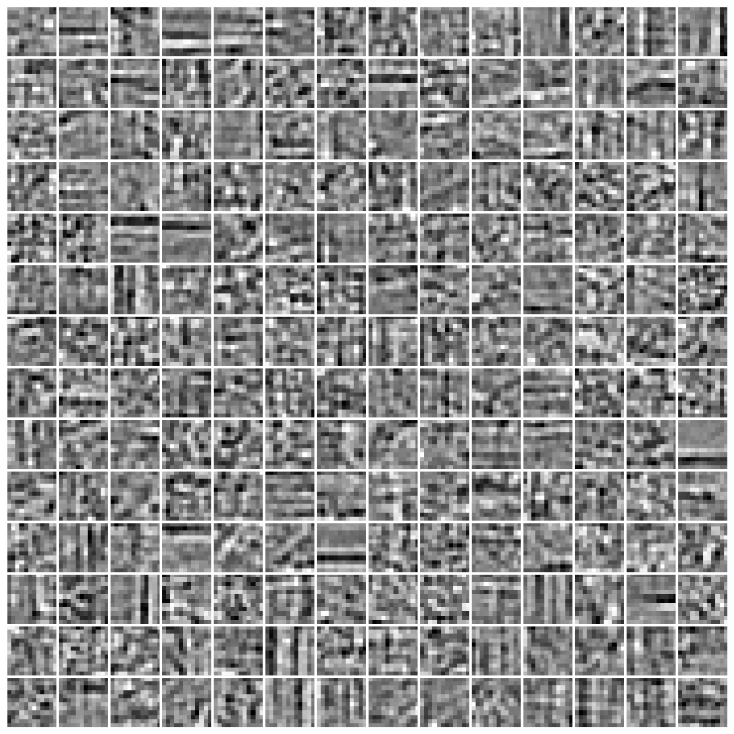

In [8]:
from shl_scripts import SHL
database = '/Users/lolo/pool/science/BICV/SHL_scripts/database/'
DEBUG_DOWNSCALE, verbose = 1, 100
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 100
shl = SHL(database=database, DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
dico = shl.learn_dico()
shl.show_dico(dico)

In [9]:
for eta in np.logspace(-4, 0, int(15/(DEBUG_DOWNSCALE)**.3), base=10, endpoint=False):
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta=eta, verbose=verbose)
    dico = shl.learn_dico()
    shl.show_dico(dico, title='eta={}'.format(eta))

Extracting data...

--- Logging error ---
Traceback (most recent call last):
  File "/Users/lolo/pool/science/BICV/SLIP/src/SLIP.py", line 201, in list_database
    filelist = os.listdir(self.full_url(name_database))
FileNotFoundError: [Errno 2] No such file or directory: 'database/serre07_distractors'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/logging/__init__.py", line 980, in emit
    msg = self.format(record)
  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/logging/__init__.py", line 830, in format
    return fmt.format(record)
  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/logging/__init__.py", line 567, in format
    record.message = record.getMessage()
  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/loggin



AttributeError: 'str' object has no attribute 'shape'

## a quick diagnostic of what is wrong

An assumption in the previous code is the heuristics used to control how elements are chosen. Basically, we have set the norm of every dictionary element to the inverse of an estimate of the mean variance, such that a high variance means a lower norm and a lower corresponding coefficient: it will thus get less likely to be selected again. 

In [ ]:
data = shl.get_data()

In [ ]:
dico.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=shl.n_components)
code = dico.transform(data)

In [ ]:
Z = np.mean(code**2)
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.bar(np.arange(shl.n_components), np.mean(code**2/Z, axis=0))#, yerr=np.std(code**2/Z, axis=0))
ax.set_title('Variance of coefficients')
ax.set_ylabel('Variance')
ax.set_xlabel('#')
ax.axis('tight')
fig.show()

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
data = pd.DataFrame(np.mean(code**2/Z, axis=0), columns=['Variance'])
with sns.axes_style("white"):
    ax = sns.distplot(data['Variance'],  kde_kws={'clip':(0., 5.)})
ax.set_title('distribution of the mean variance of coefficients')
ax.set_ylabel('pdf')
fig.show()

In particular, those with high-variance are more likely features that were more learned, while those with lower variance correspond to textures closer to the initail state of the dictionary. That is shown by ordering filters in the dictionary (from the first line on the top from left to right and then to the bottom):

In [ ]:
sorted_idx = np.argsort(np.mean(code**2/Z, axis=0))
dico.components_ = dico.components_[sorted_idx, :]
fig = shl.show_dico(dico)
fig.show()

In [ ]:
print(dico.components_.shape, data.shape)

In [ ]:
data = shl.get_data()
#dico.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=shl.n_components)
#code = dico.transform(data)
coef = np.dot(dico.components_, data.T).T / np.sum(dico.components_**2, axis=1)[np.newaxis, :]
#Z = np.mean(code**2)
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.bar(np.arange(shl.n_components), np.mean(coef**2, axis=0))#, yerr=np.std(code**2/Z, axis=0))
ax.set_title('Variance of linear coefficients')
ax.set_ylabel('Variance')
ax.set_xlabel('#')
ax.axis('tight')
fig.show()

By the scaling law of a linear filter, one may normalize the norm of the filters relative to the mean deviation (root square of variance) measured on the input. By doing this operation, the observed variance of the linear coefficients is normalized to the same value. That's what we have with the heuristics implemented in the previous notebook.

However, the learning rate (``gain_rate``) of this heuristics may be hard to tune. Most importantly, this heuristics assumes that all components are scaled (for instance that the first to learn will have higher variance and that its whole distribution will be scaled), and thus assumes that they all have the same distribution. This assumption misses an important aspect of this unsupervised learning scheme. 

Indeed, when a feature appears during the learning, its response is scaled but its distribution becomes more kurtotic. This may be understood using the central limit theorem. When mixing signals such as when computing the average of random variables, the distribution converges to a Gaussian. 

Let's show the distribution of the two dictionary elements with respectively the highest (left) and lowest (right) variance:

In [ ]:
sorted_idx = np.argsort(np.mean(coef**2, axis=0))
# plot distribution of most kurtotic vs least
fig = plt.figure(figsize=(12, 4))
for i, idx in enumerate([0, -1]):
    #data = pd.DataFrame(code[:, sorted_idx[idx]], columns=['coefficient'])
    with sns.axes_style("white"):
        ax = fig.add_subplot(1, 2, i)
        n_bins = 30
        n, bins = np.histogram((np.abs(coef[:, sorted_idx[idx]])), n_bins)# = 
        ax.bar(bins[:-1], np.log2(n), width=(np.abs(coef[:, sorted_idx[idx]].max()))/n_bins)
        #ax = sns.distplot(data['coefficient'])#,  kde_kws={'clip':(0., 5.)})
        ax.set_title('Variance = {}'.format(np.mean(coef[:, sorted_idx[idx]]**2)))
        ax.set_ylabel('log2-density')
        ax.set_xlabel('absolute coefficient')
fig.suptitle('distribution of the value of coefficients', fontsize=16)
        
fig.show()

To circumvent this problem, instead of changing the learning scheme, it is possible to change the coding procedure such that we are sure that every coefficient is selected *a priori* with the same probability. To perform that in a non-parametric fashion, one may use histogram equalization.



In [ ]:
n_samples, n_components = coef.shape
np.sort(np.abs(coef[:(n_samples/2), sorted_idx[idx]])).shape
#print(-np.sort(-np.abs(coef[:(n_samples/2), sorted_idx[idx]])))
#print(-np.sort(-np.abs(coef[:, sorted_idx[idx]]]))

In [ ]:
# plot distribution of most kurtotic vs least
fig = plt.figure(figsize=(12, 4))
for i, idx in enumerate([0, -1]):
    with sns.axes_style("white"):
        ax = fig.add_subplot(1, 2, i)
        ax.semilogx(-np.sort(-np.abs(coef[:(n_samples/2), sorted_idx[idx]])))
        ax.set_title('Variance = {}'.format(np.mean(coef[:, sorted_idx[idx]]**2)))
        ax.set_ylabel('value')
        ax.set_xlabel('rank')
        ax.axis('tight')
fig.suptitle('distribution of the value of linear coefficients', fontsize=16)
fig.show()

In [ ]:
# what we need is some sort of histogram normalization
def histeq(abs_code, mod):
    # use linear interpolation of cdf to find z-values
    # use the fact that the sorted coeffs give the inverse cdf
    # moreover we use a hack to ensure that np.interp uses an increasing sequence of x-coordinates
    z = np.interp(-abs_code, -mod, np.linspace(0, 1., mod.size, endpoint=True))
    return z

fig = plt.figure(figsize=(12, 4))
for i, idx in enumerate([0, -1]):
    mod = -np.sort(-np.abs(coef[:(n_samples/2), sorted_idx[idx]]))
    # learn distribution of z-values on the first half of the data
    z = histeq(np.abs(coef[(n_samples/2):, sorted_idx[idx]]), mod)

    #z = histeq(np.abs(coef[:(n_samples/2), sorted_idx[idx]]), mod) - to check it is exact
    # plot distribution of z-values on the second half of the data
    with sns.axes_style("white"):
        ax = fig.add_subplot(1, 2, i)
        n_bins = 30
        n, bins = np.histogram(z, n_bins)# = 
        ax.bar(bins[:-1], n, width=.5/n_bins)
        #ax.scatter(np.linspace(0, 1., z.size, endpoint=True), z)
        #ax.set_title('Variance = {}'.format(np.mean(code[:, sorted_idx[idx]]**2/Z, axis=0)))
        ax.set_ylabel('density')
        ax.set_xlabel('z-score')
        ax.axis('tight')
        
fig.suptitle('distribution of the value of z-scores', fontsize=16)
        
fig.show()

To learn this modulation function, we may just estimate it online beginning with a flat one:

In [ ]:
mod = np.dot(np.linspace(1., 0, n_samples, endpoint=True)[:, np.newaxis], np.ones((1, n_components)))
print(mod.shape)
plt.plot(mod[:, 0])

In [ ]:
print(coef.shape)
print(np.sort(np.abs(coef), axis=0).shape)
mod_ = -np.sort(-np.abs(coef), axis=0)
gain_rate = .1
mod = (1 - gain_rate)*mod + gain_rate * mod_
plt.semilogx(mod[:, 0])

In [ ]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE)
verbose = 0
dico = shl.learn_dico(learning_algorithm='comp', transform_n_nonzero_coefs=shl.n_components, gain_rate=0.001, verbose=verbose)
fig = shl.show_dico(dico)
fig.show()

In [ ]:
data = shl.get_data()
#dico.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=shl.n_components)
#code = dico.transform(data)
coef = np.dot(dico.components_, data.T).T / np.sum(dico.components_**2, axis=1)[np.newaxis, :]
#Z = np.mean(code**2)
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.bar(np.arange(shl.n_components), np.mean(coef**2, axis=0))#, yerr=np.std(code**2/Z, axis=0))
ax.set_title('Variance of linear coefficients')
ax.set_ylabel('Variance')
ax.set_xlabel('#')
ax.axis('tight')
fig.show()

In [ ]:
# plot distribution of most kurtotic vs least
sorted_idx = np.argsort(np.mean(coef**2, axis=0))
fig = plt.figure(figsize=(12, 4))
for i, idx in enumerate([0, -1]):
    #data = pd.DataFrame(code[:, sorted_idx[idx]], columns=['coefficient'])
    with sns.axes_style("white"):
        ax = fig.add_subplot(1, 2, i)
        n_bins = 30
        n, bins = np.histogram((np.abs(coef[:, sorted_idx[idx]])), n_bins)# = 
        ax.bar(bins[:-1], np.log2(n), width=(np.abs(coef[:, sorted_idx[idx]].max()))/n_bins)
        #ax = sns.distplot(data['coefficient'])#,  kde_kws={'clip':(0., 5.)})
        ax.set_title('Variance = {}'.format(np.mean(coef[:, sorted_idx[idx]]**2)))
        ax.set_ylabel('log2-density')
        ax.set_xlabel('absolute coefficient')
fig.suptitle('distribution of the value of coefficients', fontsize=16)
        
fig.show()

In [ ]:
# quick estipmation of the z-scores
#z = np.interp(-np.abs(coef[(n_samples/2):, sorted_idx[idx]]), -mod, np.linspace(0, 1., mod.size, endpoint=True))
from shl_scripts import SHL
DEBUG_DOWNSCALE=1
for gain_rate in np.logspace(-4, 0, 15, base=10):
    #
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE)
    dico = shl.learn_dico(learning_algorithm='comp', transform_n_nonzero_coefs=10, gain_rate=gain_rate)
    fig = shl.show_dico(dico)
    fig.show()
    data = shl.get_data()           
    dico.set_params(transform_algorithm='omp', transform_n_nonzero_coefs=shl.n_components)
    code = dico.transform(data)
    n_components, n_samples = code.shape
    Z = np.mean(code**2)
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    ax.bar(np.arange(shl.n_components), np.mean(code**2, axis=0)/Z)
    ax.set_title('Variance of coefficients - gain {}'.format(gain_rate))
    ax.set_ylabel('Variance')
    ax.set_xlabel('#')      
    ax.axis('tight')
    fig.show()
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    data = pd.DataFrame(np.mean(code**2, axis=0)/np.mean(code**2), columns=['Variance'])
    with sns.axes_style("white"):
        ax = sns.distplot(data['Variance'],  kde_kws={'clip':(0., 5.)})
    ax.set_title('distribution of the mean variance of coefficients')
    ax.set_ylabel('pdf')
    fig.show()

## great, let's try that new version  of the classical algorithm

## contributing code to sklearn

As previously, let's contribute this bit of code to ``sklearn``:

- set-up variables

       cd ~/pool/libs/
       github_user='bicv'
       lib='scikit-learn'
       project='comp'
       git clone https://github.com/$github_user/$lib
       cd $lib
       
-  creating a new branch for his project

       git branches
       git remote add $github_user https://github.com/$github_user/$lib
       git checkout -b $project

- installing the library in dev mode:

       pip uninstall $lib
       pip install -e .

- making the one line change to moviepy's code and test it with the minimum working example above:

       mvim -p sklearn/decomposition/dict_learning.py sklearn/linear_model/omp.py


More details on ``MiniBatchDictionaryLearning``:
 
 - doc page: http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html
 - source code : https://github.com/scikit-learn/scikit-learn/blob/bb39b49/sklearn/decomposition/dict_learning.py#L1018